# 🧬 EDA: Disease Diagnosis Classification

Welcome to the 21-step Exploratory Data Analysis (EDA) notebook for the **Disease Diagnosis** multiclass classification scenario.  
We aim to explore and understand the variables that influence diagnosis outcomes based on health data.

---

📁 **Dataset:** `EDA_DiseaseDiagnosis_Dataset.csv`  
🎯 **Target Variable:** `diagnosis_code`  
🔢 **Problem Type:** Multiclass Classification  


## 📥 Step 1: Load Dataset

In [1]:

import pandas as pd
df = pd.read_csv("EDA_DiseaseDiagnosis_Dataset.csv")
df.head()


,patient_id,age,gender,blood_pressure,heart_rate,glucose_level,cholesterol_level,symptom_duration,clinical_notes,department,admission_type,insurance_status,diagnosis_code
0,PAT00000,80,Female,125.9,61.3,136.3,95.7,15,headache and nausea,Orthopedics,Inpatient,Insured,D141
1,PAT00001,7,Male,136.9,68.8,126.9,133.5,7,abdominal discomfort,Orthopedics,Emergency,Insured,D196
2,PAT00002,34,Male,103.7,68.0,117.8,153.3,23,fever and fatigue,General Medicine,Outpatient,Insured,D165
3,PAT00003,34,Female,135.6,65.0,102.4,203.4,5,joint pain,Cardiology,Outpatient,Insured,D196
4,PAT00004,32,Female,151.6,78.8,141.5,251.0,12,chest pain,Orthopedics,Inpatient,Uninsured,D196


## 🧾 Step 2: Dataset Overview

In [2]:

print("Shape:", df.shape)
df.info()
df.describe(include='all').T


Shape: (10000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         10000 non-null  object 
 1   age                10000 non-null  int64  
 2   gender             10000 non-null  object 
 3   blood_pressure     10000 non-null  float64
 4   heart_rate         10000 non-null  float64
 5   glucose_level      10000 non-null  float64
 6   cholesterol_level  10000 non-null  float64
 7   symptom_duration   10000 non-null  int64  
 8   clinical_notes     10000 non-null  object 
 9   department         10000 non-null  object 
 10  admission_type     10000 non-null  object 
 11  insurance_status   10000 non-null  object 
 12  diagnosis_code     10000 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1015.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_id,10000,10000,PAT00000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,44.4528,25.9518,0.0,22.0,44.0,67.0,89.0
gender,10000,3,Female,4982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_pressure,10000.0,NaN,NaN,NaN,120.13804,15.091376,62.2,109.8,120.2,130.5,187.2
heart_rate,10000.0,NaN,NaN,NaN,74.92768,9.97053,30.3,68.1,75.0,81.7,112.3
glucose_level,10000.0,NaN,NaN,NaN,99.97652,25.04059,9.2,82.775,100.0,117.0,188.4
cholesterol_level,10000.0,NaN,NaN,NaN,180.04955,39.839699,8.2,153.4,180.3,206.8,329.8
symptom_duration,10000.0,NaN,NaN,NaN,14.8767,8.442063,1.0,8.0,15.0,22.0,29.0
clinical_notes,10000,8,fever and fatigue,1289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,10000,5,General Medicine,2038,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 📊 Step 3: Univariate Analysis

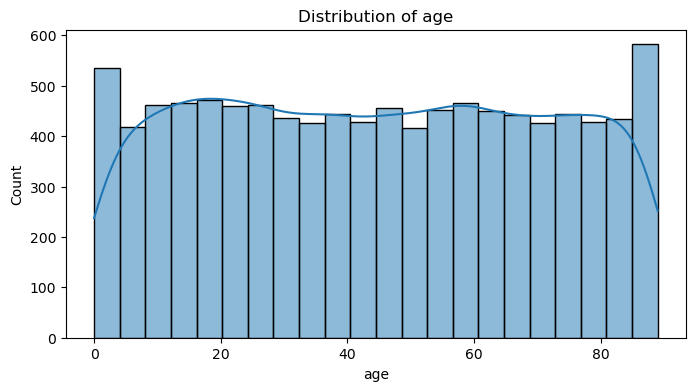

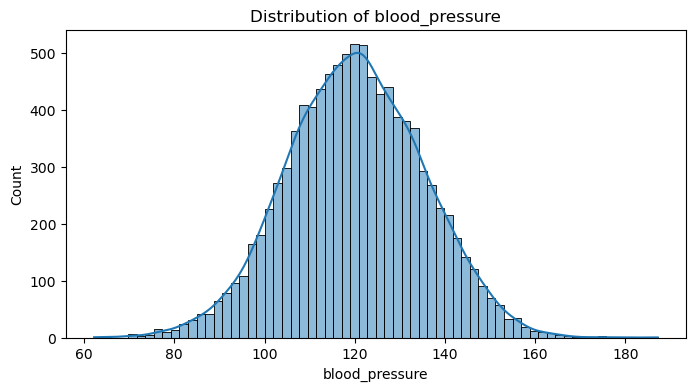

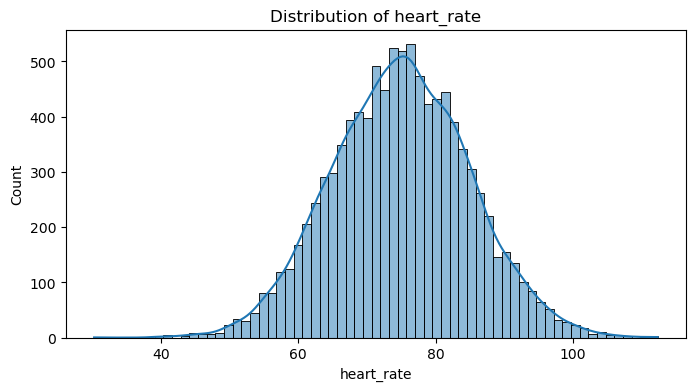

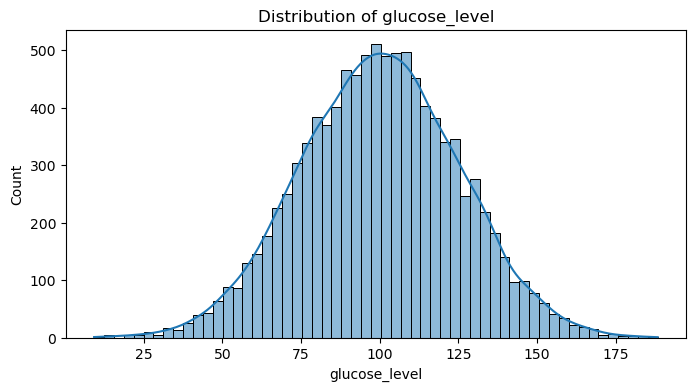

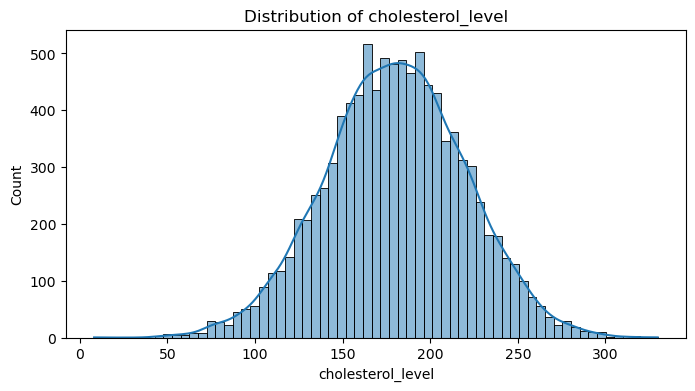

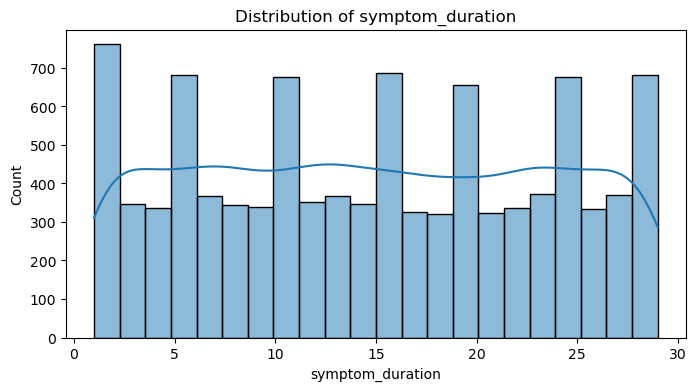

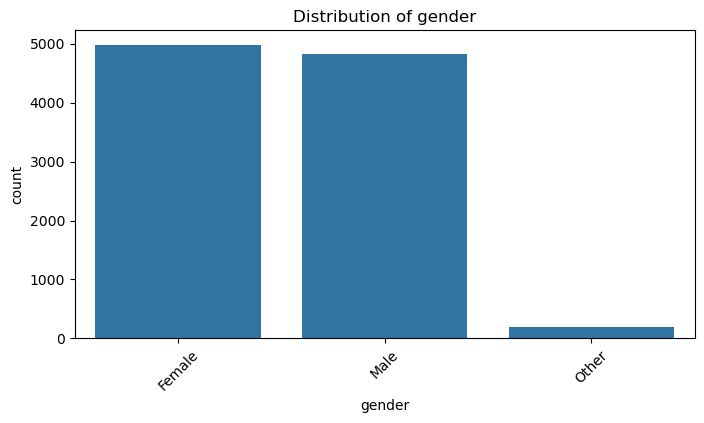

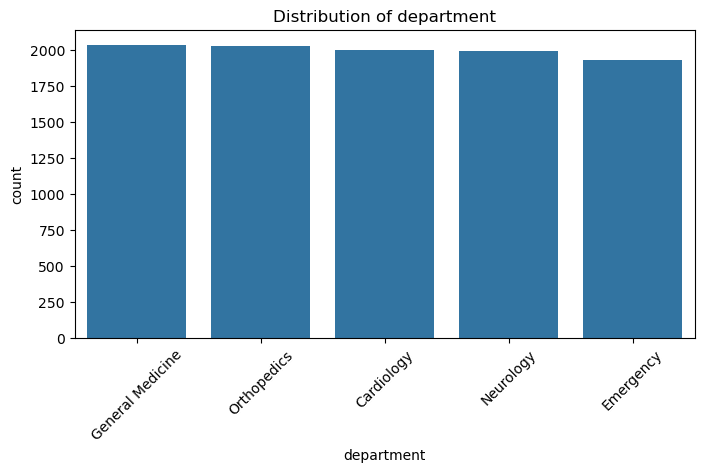

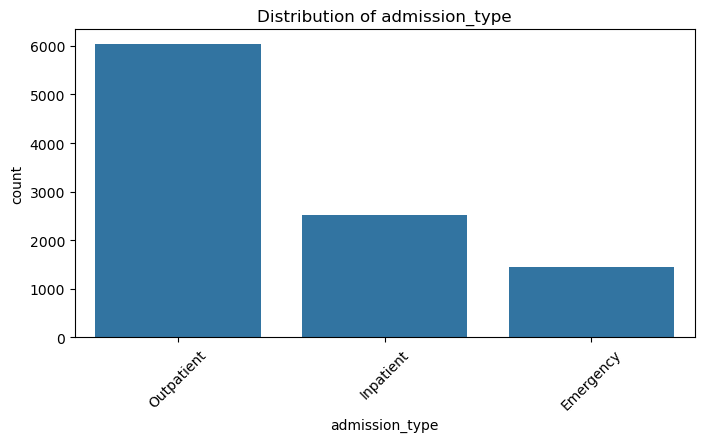

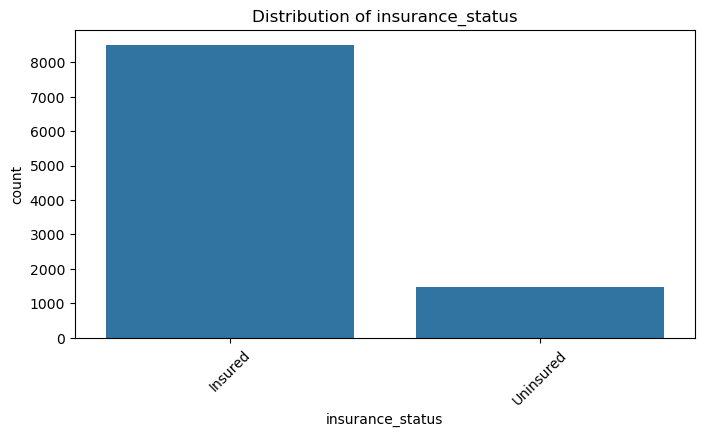

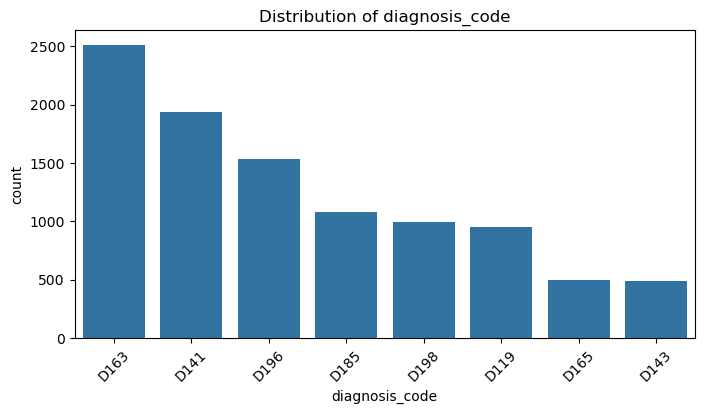

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').drop(['patient_id', 'clinical_notes'], axis=1).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


## 📉 Step 4: Bivariate Analysis

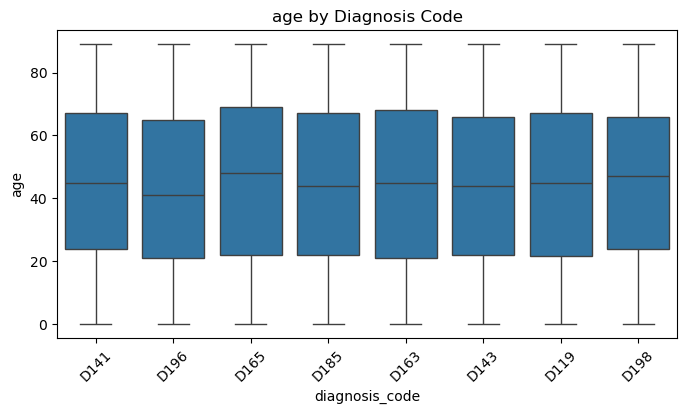

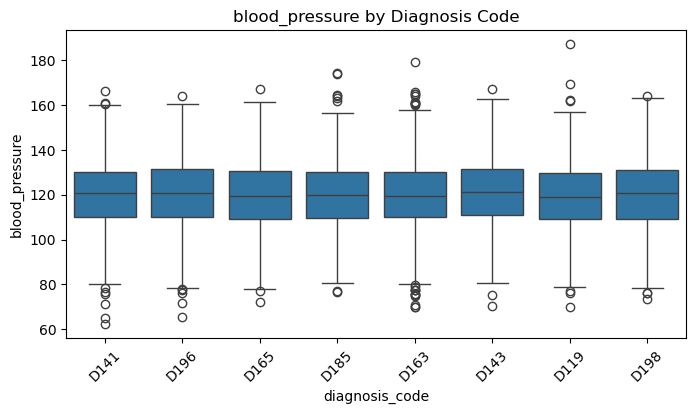

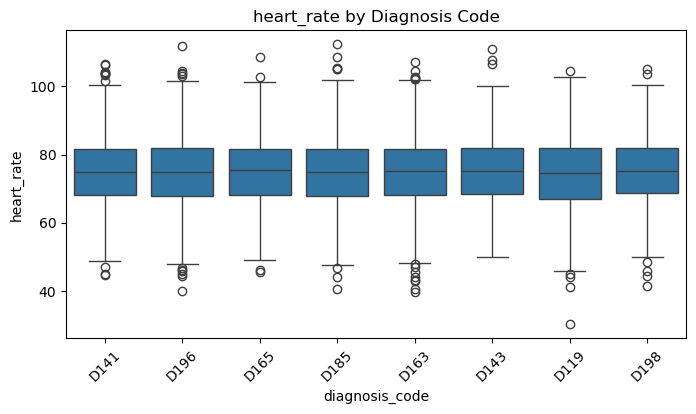

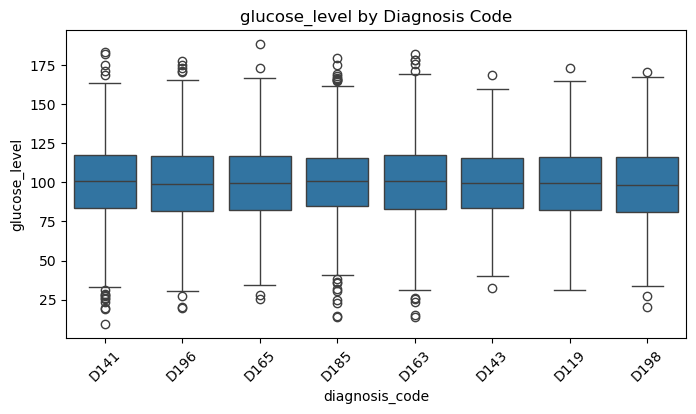

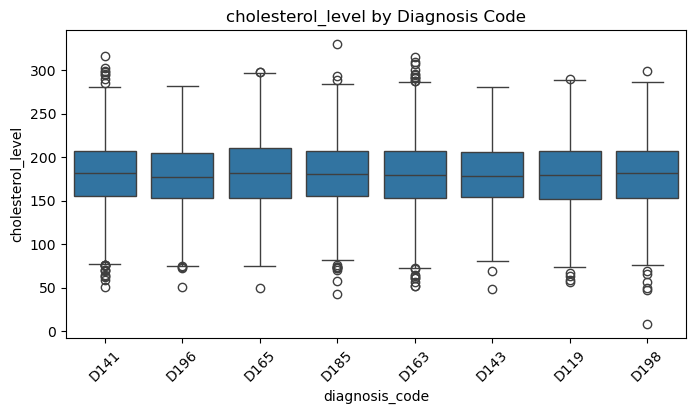

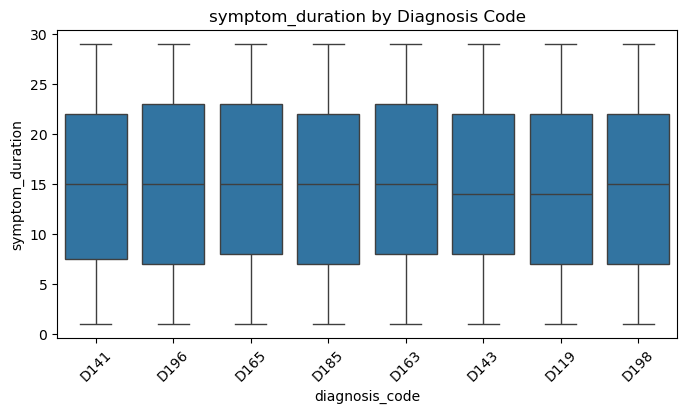

In [4]:

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='diagnosis_code', y=col, data=df)
    plt.title(f'{col} by Diagnosis Code')
    plt.xticks(rotation=45)
    plt.show()


## 📊 Step 5: Multivariate Analysis

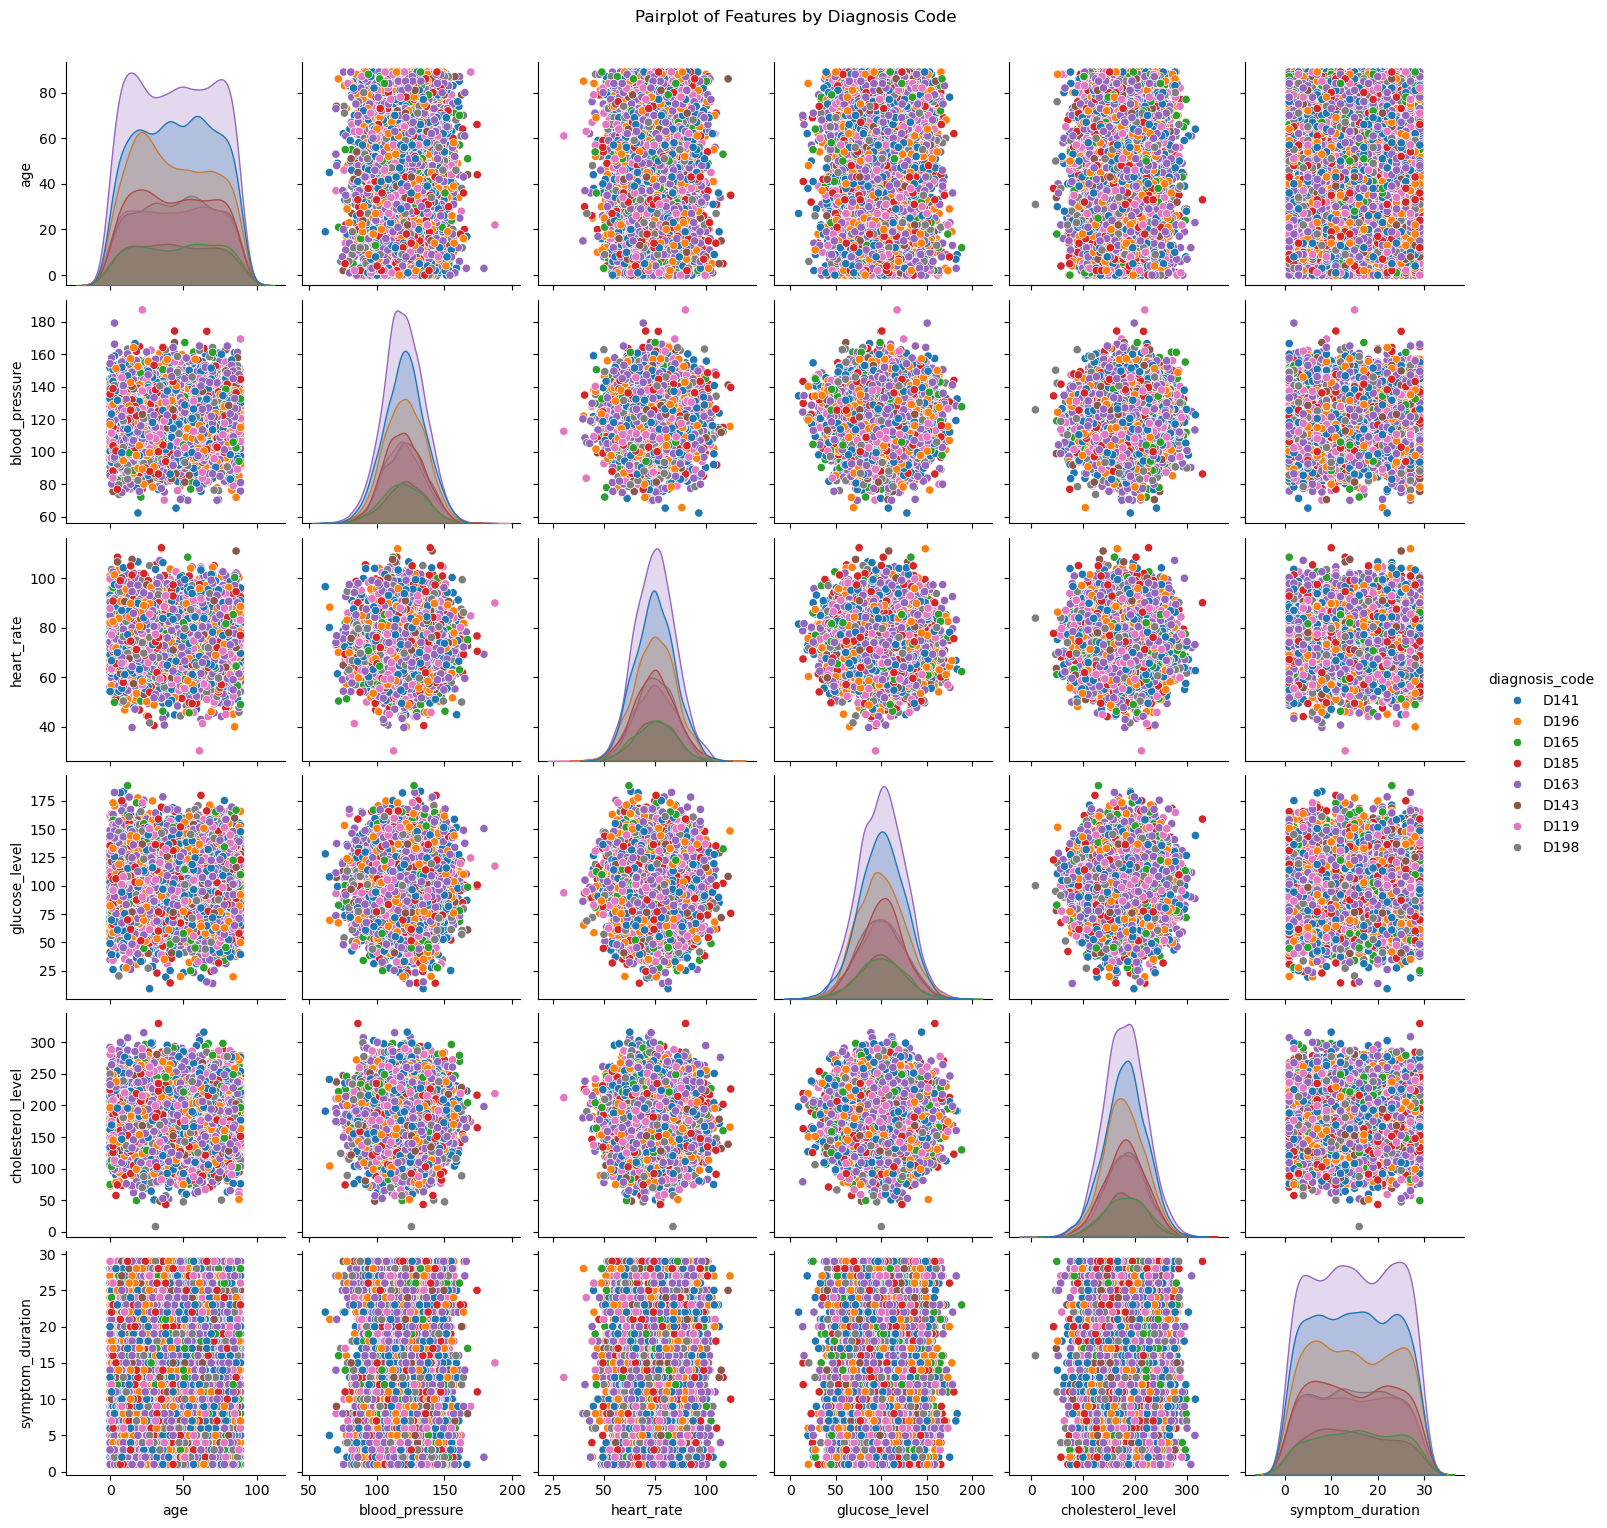

In [5]:

sns.pairplot(df[numerical_cols.tolist() + ['diagnosis_code']], hue='diagnosis_code')
plt.suptitle("Pairplot of Features by Diagnosis Code", y=1.02)
plt.show()


## ❓ Step 6: Missing Value Analysis

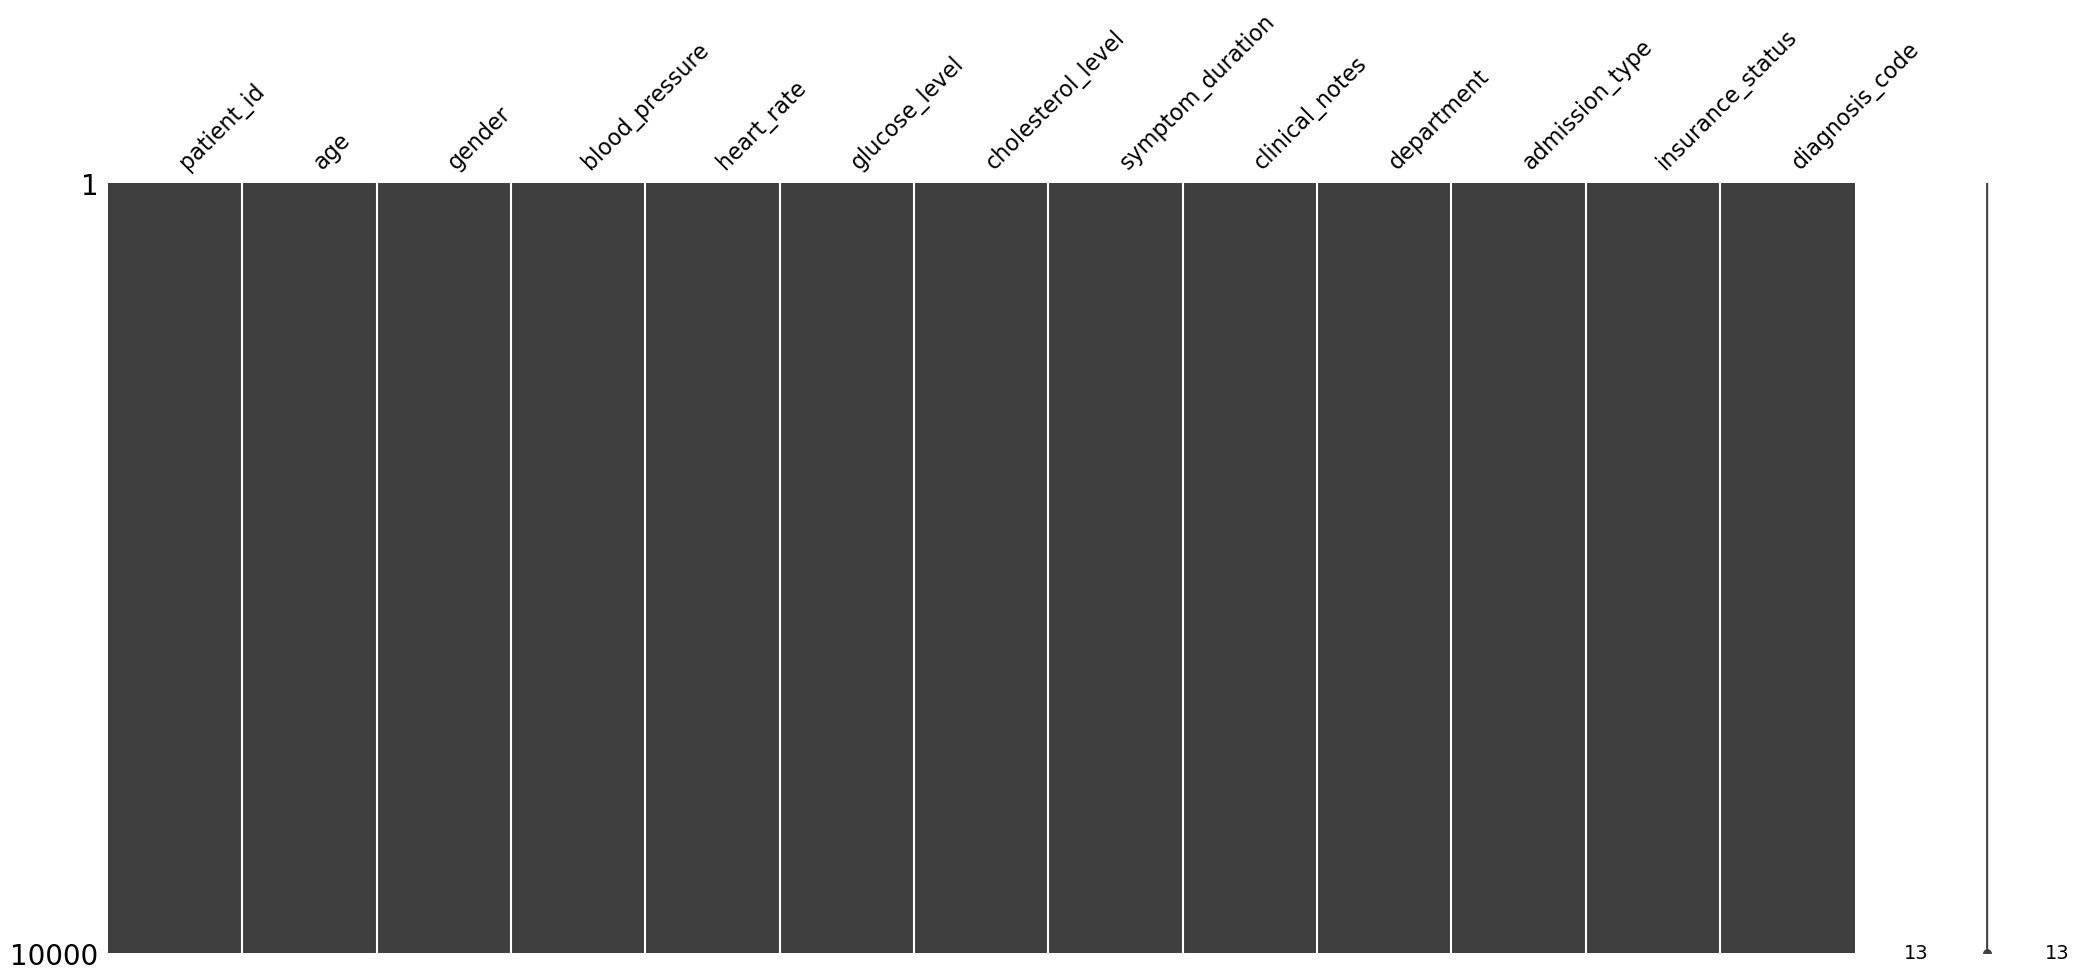

In [6]:

import missingno as msno
msno.matrix(df)
plt.show()


## 🚨 Step 7: Outlier Detection

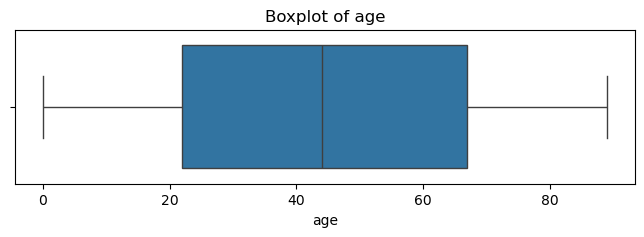

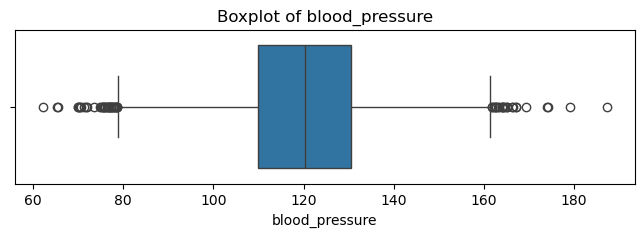

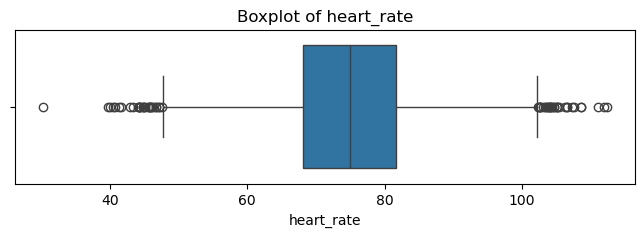

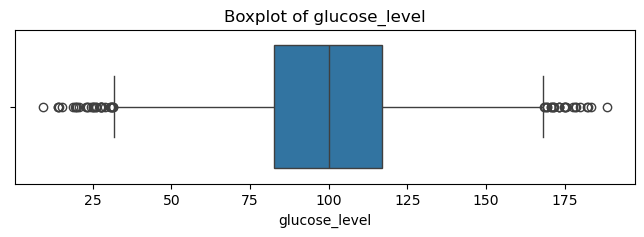

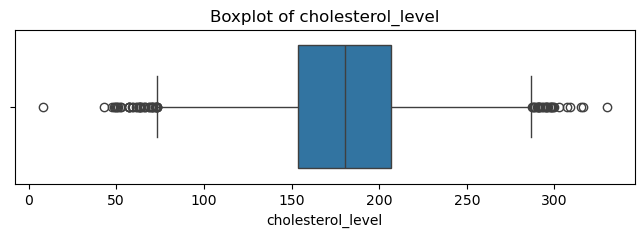

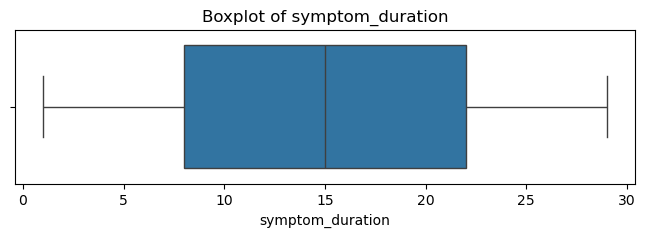

In [7]:

for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## 🔄 Step 8: Skewness & Transformation

In [8]:

from scipy.stats import skew
import numpy as np

skew_vals = df[numerical_cols].apply(lambda x: skew(x.dropna()))
print(skew_vals)

for col in skew_vals[skew_vals > 1].index:
    df[f'{col}_log'] = np.log1p(df[col])


age                  0.014439
blood_pressure      -0.011184
heart_rate           0.012425
glucose_level       -0.015861
cholesterol_level   -0.048712
symptom_duration     0.015444
dtype: float64


## 🎯 Step 9: Target Analysis

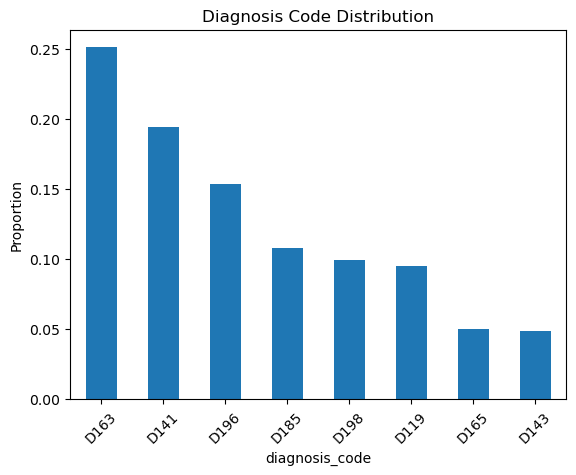

In [9]:

df['diagnosis_code'].value_counts(normalize=True).plot(kind='bar')
plt.title("Diagnosis Code Distribution")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()


## 🔗 Step 10: Correlation Analysis

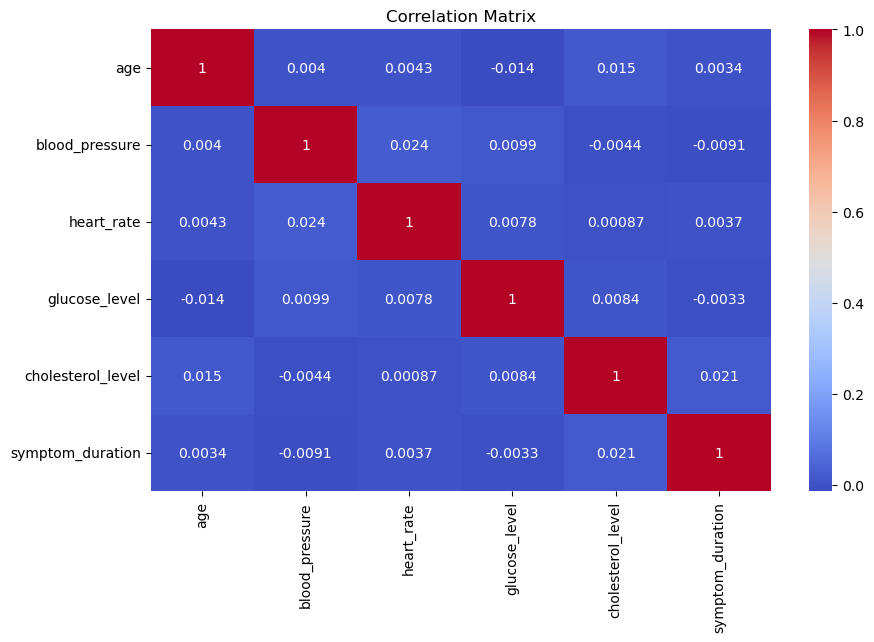

In [10]:

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## ⚖️ Step 11: Class Imbalance

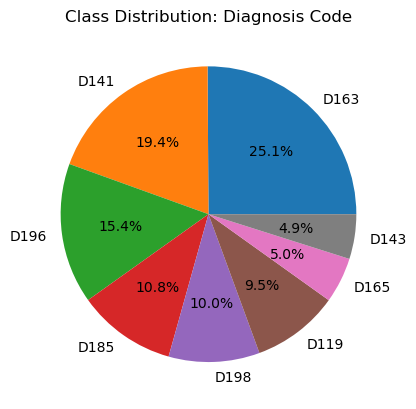

In [11]:

df['diagnosis_code'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Class Distribution: Diagnosis Code")
plt.ylabel("")
plt.show()


## 🔢 Step 12: Cardinality Check

In [12]:

df[categorical_cols].nunique().sort_values(ascending=False)


diagnosis_code      8
department          5
gender              3
admission_type      3
insurance_status    2
dtype: int64

## 🧼 Step 13: Data Quality Check

In [13]:

print("Duplicates:", df.duplicated().sum())
zero_var_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Zero-variance columns:", zero_var_cols)


Duplicates: 0
Zero-variance columns: []


## ⏱️ Step 14: Time Profiling

In [14]:

# Placeholder - No time column present
print("No temporal features available.")


No temporal features available.


## 🧩 Step 15: Multicollinearity (VIF)

In [15]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[numerical_cols].dropna()
X = add_constant(X)
pd.DataFrame({
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    "Feature": X.columns
})


,VIF,Feature
0,159.020015,const
1,1.000482,age
2,1.000769,blood_pressure
3,1.000645,heart_rate
4,1.000443,glucose_level
5,1.000751,cholesterol_level
6,1.000542,symptom_duration


## 🔁 Step 16: Interaction Effects

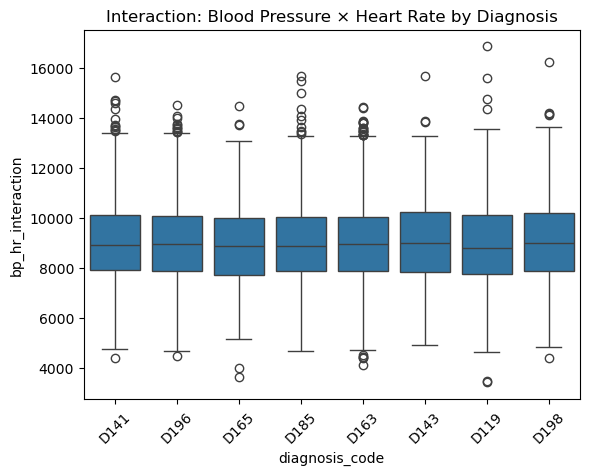

In [16]:

df['bp_hr_interaction'] = df['blood_pressure'] * df['heart_rate']
sns.boxplot(x='diagnosis_code', y='bp_hr_interaction', data=df)
plt.title("Interaction: Blood Pressure × Heart Rate by Diagnosis")
plt.xticks(rotation=45)
plt.show()


## 🧯 Step 17: Data Leakage Check

In [17]:

df.groupby('diagnosis_code')[['department', 'admission_type']].value_counts(normalize=True)


diagnosis_code  department        admission_type
D119            Emergency         Outpatient        0.139706
                Cardiology        Outpatient        0.132353
                Orthopedics       Outpatient        0.126050
                General Medicine  Outpatient        0.119748
                Neurology         Outpatient        0.114496
                                                      ...   
D198            Cardiology        Emergency         0.036181
                Emergency         Emergency         0.032161
                Orthopedics       Emergency         0.031156
                General Medicine  Emergency         0.025126
                Neurology         Emergency         0.025126
Name: proportion, Length: 120, dtype: float64

## 🛠️ Step 18: Feature Engineering Hints

In [18]:

df['bp_glucose_ratio'] = df['blood_pressure'] / (df['glucose_level'] + 1)
df['duration_per_hr'] = df['symptom_duration'] / (df['heart_rate'] + 1)
df[['bp_glucose_ratio', 'duration_per_hr']].describe()


,bp_glucose_ratio,duration_per_hr
count,10000.000000,10000.000000
mean,1.284601,0.199427
std,0.486520,0.117344
min,0.474184,0.009132
25%,0.994380,0.099419
50%,1.188149,0.194490
75%,1.454143,0.292853
max,13.166667,0.682927


## 🔍 Step 19: Clustering Patterns

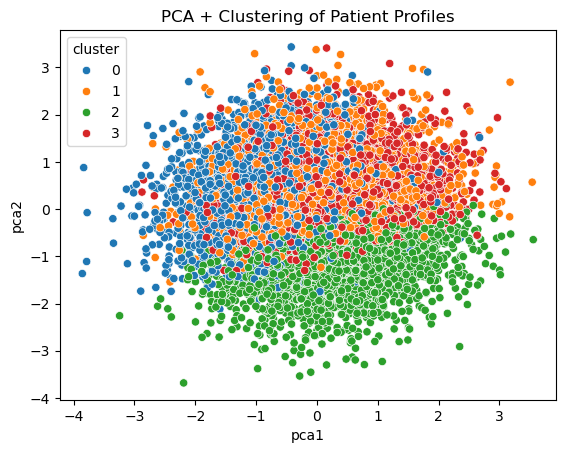

In [19]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaled = StandardScaler().fit_transform(df[numerical_cols])
pca = PCA(n_components=2).fit_transform(scaled)
df['pca1'], df['pca2'] = pca[:, 0], pca[:, 1]
df['cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(scaled)

sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='tab10', data=df)
plt.title("PCA + Clustering of Patient Profiles")
plt.show()


## 🤖 Step 20: AutoEDA Tools

In [20]:

# !pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Disease Diagnosis AutoEDA", explorative=True)
profile.to_file("autoeda_disease_diagnosis.html")


/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:  81%|████████  | 21/26 [00:00<00:00, 44.39it/s, Calculate auto correlation]/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 6 0 ... 9 0 6]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 105.79it/s]


## 📐 Step 21: Statistical EDA

In [21]:

from scipy.stats import f_oneway

for col in numerical_cols:
    groups = [group[col].values for name, group in df.groupby('diagnosis_code')]
    stat, p = f_oneway(*groups)
    print(f"ANOVA for {col}: p = {p:.4f}")


ANOVA for age: p = 0.2799
ANOVA for blood_pressure: p = 0.6249
ANOVA for heart_rate: p = 0.9207
ANOVA for glucose_level: p = 0.8373
ANOVA for cholesterol_level: p = 0.8923
ANOVA for symptom_duration: p = 0.7121
